In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('talk')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >13:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

root_dir = '/Volumes/Samsung_1TB/AstroData/MAXI_J1848m015/'
fig_dir = root_dir + 'figures/'

file = open('/Users/sean/Desktop/ToSean210504/maxij1848_6h_210427_bg_s3m2M6.qdp', 'r')
data = read_QDP(file)

data = data[0]



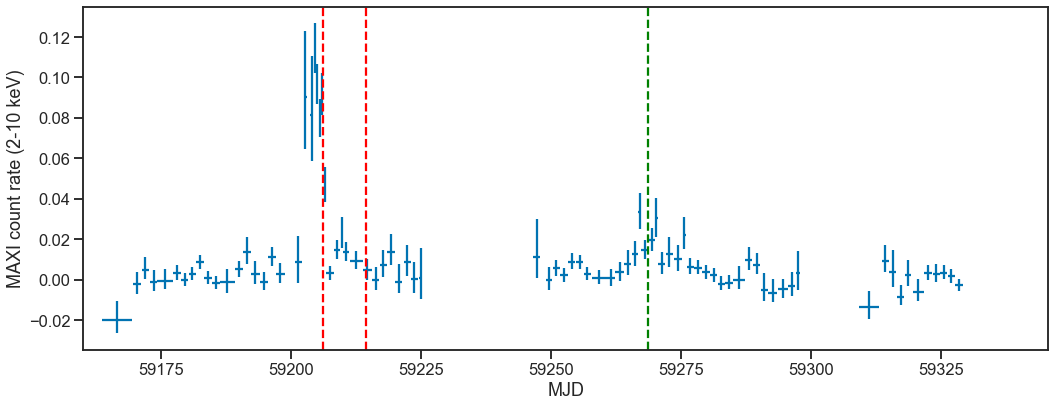

In [2]:
plt.figure(figsize=(15,6))
plt.errorbar(data[0],data[2],xerr=data[1],yerr=[-data[4], data[3]], ls='')
plt.ylim((-0.035,0.135))
plt.axvline(5.921438850039339E+04, color='red', ls='dashed')
plt.axvline(5.920614085861111E+04, color='red', ls='dashed')
plt.axvline(59268.62083333, color='green', ls='dashed')
plt.xlim(left=59160)
plt.xlabel('MJD')
plt.ylabel('MAXI count rate (2-10 keV)')
plt.tight_layout()
plt.savefig(fig_dir + 'MAXI_2_10keV_full_withNustarNicer.pdf')

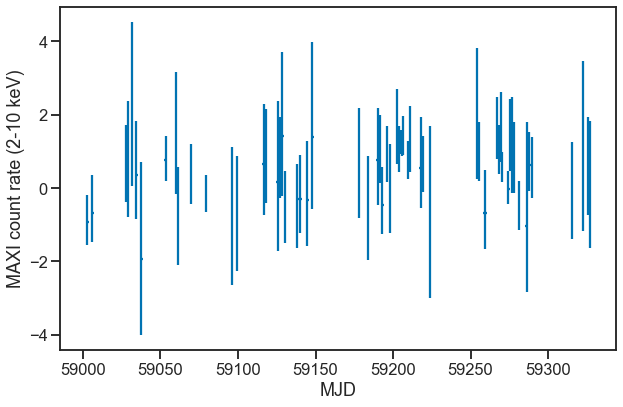

In [78]:
noratio = data[11]==0.0
high_err = data[12] > 3.0
full_mask = ~noratio * ~high_err
plt.figure(figsize=(9,6))
plt.errorbar(data[0][full_mask],data[11][full_mask],xerr=data[1][full_mask],yerr=[-data[13][full_mask], data[12][full_mask]], ls='')
# plt.ylim((-10,10))
plt.xlabel('MJD')
plt.ylabel('MAXI count rate (2-10 keV)')
plt.tight_layout()